In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C://Users//Ruhan Siddiqui//Downloads//sentimental analysis'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C://Users//Ruhan Siddiqui//Downloads//sentimental analysis\training.1600000.processed.noemoticon.csv


In [2]:
dataset_encoder="ISO-8859-1"
dataset_column=['sentiments','id','date','flag','user','text']
dataset=pd.read_csv("C://Users//Ruhan Siddiqui//Downloads//sentimental analysis//training.1600000.processed.noemoticon.csv",encoding=dataset_encoder,names=dataset_column)


In [3]:
dataset

,sentiments,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [4]:
# remove the unneccesory columns
dataset=dataset[['sentiments','text']]


In [5]:
dataset

,sentiments,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [6]:
dataset['sentiments'].unique()

array([0, 4], dtype=int64)

In [7]:
dataset['sentiments']=dataset['sentiments'].replace(4,1)

C:\Users\Ruhan Siddiqui\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
dataset['sentiments'].unique()

array([0, 1], dtype=int64)

In [9]:
dataset.tail(10)

,sentiments,text
1599990,1,WOOOOO! Xbox is back
1599991,1,@rmedina @LaTati Mmmm That sounds absolutely ...
1599992,1,ReCoVeRiNg FrOm ThE lOnG wEeKeNd
1599993,1,@SCOOBY_GRITBOYS
1599994,1,"@Cliff_Forster Yeah, that does work better tha..."
1599995,1,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...
1599999,1,happy #charitytuesday @theNSPCC @SparksCharity...


[Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

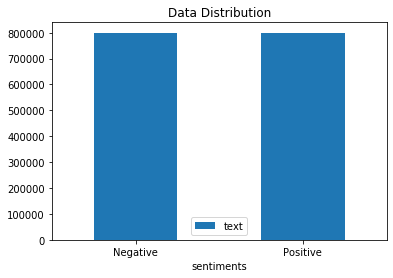

In [10]:
#Ploting
plt=dataset.groupby('sentiments').count().plot(kind='bar',title='Data Distribution',legend=True)
plt.set_xticklabels(["Negative","Positive"],rotation=0)

In [11]:
# store the data in list
text,sentiment=list(dataset['text']),list(dataset['sentiments'])

In [12]:
# PreProcess the data
#for preprocess we have to remove all the emojies and stopword and make all letter to small and many more things. Here we gono do the same step by step.

# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}
# the data i am using here is taken from google you can simply go through this on google and get this much emojies in text form 

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [14]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
# Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']


In [15]:
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    import re
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])  
        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText
 
    

In [16]:
from nltk.stem import WordNetLemmatizer
processedtext = preprocess(text)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment,
                                                    test_size = 0.05, random_state = 0)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
vectorization=TfidfVectorizer(ngram_range=(1,2),max_features=500000)
vectorization.fit(X_train)


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0,
                max_features=500000, min_df=1, ngram_range=(1, 2), norm='l2',
                preprocessor=None, smooth_idf=True, stop_words=None,
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [19]:
X_train = vectorization.transform(X_train)
X_test  = vectorization.transform(X_test)

In [20]:
# data evaluation
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    cf_matrix = confusion_matrix(y_test, y_pred)
    print(cf_matrix)


In [ ]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
regressor.fit(X_train, y_train)
model_Evaluate(regressor)

In [ ]:
import pickle
file=open('vetorizer.pickle','wb')
pickle.dump(vectorization,file)
file.close()

In [ ]:
file1=open('Regressor.pickle','wb')
pickle.dump(regressor,file1)
file1.close()

In [30]:
#Using the Model
def load_models():
    file=open('./Regressor.pickle','rb')
    regression=pickle.load(file)
    file.close()
    
    file=open('./vetorizer.pickle','rb')
    vectorizer=pickle.load(file)
    file.close()
    
    return vectorizer,regression
    


In [31]:
def predict(vectoriser, model, text):
    # Predict the sentiment
    textdata = vectorization.transform(preprocess(text))
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

if __name__=="__main__":
    # Loading the models.
    #vectoriser, LRmodel = load_models()
    
    # Text to classify should be in a list.
    text = ["I hate twitter",
            "May the Force be with you.",
            "Mr. Stark, I don't feel so good"]
    
    df = predict(vectorization, regressor, text)
    print(df.head())


                              text sentiment
0                   I hate twitter  Negative
1       May the Force be with you.  Positive
2  Mr. Stark, I don't feel so good  Negative


In [44]:
def predict(vectorization,model,text):
    textdata=vectorization.transform(preprocess(text))
    sentiment=model.predict(textdata)
    
    data=[]
    for text,pred in zip(text,sentiment):
        data.append((text,pred))
    
    #converting list into df
    dataset_created=pd.DataFrame(data,columns=['text','sentiment'])
    dataset_created= dataset_created.replace([0,1],['Negative','Positive'])
    return dataset_created

if __name__=='__main__':
    text=["I Love my India","I am very sad","Good to know You are Fine","See You Soon","Ayush have a Lot Of Patience","I miss mommy  oh, and aba.","rip ravi","wishing warren buffett a very special 90th birthday - thank you for your leadership, friendship unwavening commitment to american innovation","fuck of them","so heartbreaking to read rip chadwick boseman"]
    dataset_Predict=predict(vectorization,regressor,text)
    dataset_Predict
    


In [45]:
dataset_Predict.to_csv("Predicted_result.csv")

In [46]:
dataset_Predict

,text,sentiment
0,I Love my India,Positive
1,I am very sad,Negative
2,Good to know You are Fine,Positive
3,See You Soon,Positive
4,Ayush have a Lot Of Patience,Positive
5,"I miss mommy oh, and aba.",Negative
6,rip ravi,Negative
7,wishing warren buffett a very special 90th bir...,Positive
8,fuck of them,Negative
9,so heartbreaking to read rip chadwick boseman,Negative
